In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import PIL
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
 

In [3]:
dataset_url="https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir=tf.keras.utils.get_file("flower_photos",origin=dataset_url,cache_dir=".",untar=True)

In [4]:
data_dir

'.\\datasets\\flower_photos'

In [5]:
import pathlib
data_dir=pathlib.Path(data_dir)

In [6]:
data_dir

WindowsPath('datasets/flower_photos')

In [7]:
image_count=list(data_dir.glob('*/*.jpg'))

In [8]:
len(image_count)

3670

In [9]:
image_count[0]

WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg')

In [10]:
plt.gray()

<Figure size 640x480 with 0 Axes>

In [11]:
roses=list(data_dir.glob("roses/*"))

In [23]:
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

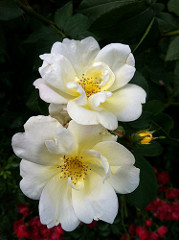

In [12]:
PIL.Image.open(str(roses[0]))

In [13]:
tulips=list(data_dir.glob("tulips/*"))

In [15]:
flower_images={
    "roses":list(data_dir.glob("roses/*")),
    "tulips":list(data_dir.glob("tulips/*")),
    "dandelions":list(data_dir.glob("dandelion/*")),
    "sunflowers":list(data_dir.glob("sunflowers/*")),
    "daisy":list(data_dir.glob("daisy/*"))
}

In [16]:
flowers_labels_dict={
    "roses":0,
    "tulips":1,
    "dandelions":2,
    "sunflowers":3,
    "daisy":4
}

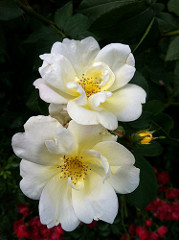

In [55]:
img1=PIL.Image.open(flower_images["roses"][0])
img1

In [56]:
#img1.shape
img1=np.array(img1)
img1

array([[[ 6, 15,  0],
        [ 6, 15,  0],
        [ 8, 17,  0],
        ...,
        [31, 51, 24],
        [32, 52, 25],
        [33, 53, 26]],

       [[14, 22,  7],
        [14, 22,  7],
        [13, 21,  6],
        ...,
        [30, 46, 20],
        [33, 49, 23],
        [35, 51, 25]],

       [[15, 23, 12],
        [15, 23, 12],
        [14, 22, 11],
        ...,
        [30, 42, 20],
        [33, 45, 23],
        [36, 48, 26]],

       ...,

       [[27, 30, 19],
        [18, 24, 14],
        [13, 20, 12],
        ...,
        [ 3, 13,  4],
        [ 1,  8,  0],
        [ 0,  5,  0]],

       [[28, 30, 19],
        [24, 27, 18],
        [16, 23, 15],
        ...,
        [ 2, 12,  3],
        [ 2,  9,  1],
        [ 2,  7,  0]],

       [[19, 19,  9],
        [24, 25, 17],
        [24, 29, 22],
        ...,
        [ 2, 12,  1],
        [ 3, 10,  2],
        [ 4, 11,  3]]], dtype=uint8)

In [57]:
img=cv2.imread(str(flower_images["roses"][0]))

In [46]:
flower_images["roses"][0]

WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg')

In [58]:
img

array([[[ 0, 15,  6],
        [ 0, 15,  6],
        [ 0, 17,  8],
        ...,
        [24, 51, 31],
        [25, 52, 32],
        [26, 53, 33]],

       [[ 7, 22, 14],
        [ 7, 22, 14],
        [ 6, 21, 13],
        ...,
        [20, 46, 30],
        [23, 49, 33],
        [25, 51, 35]],

       [[12, 23, 15],
        [12, 23, 15],
        [11, 22, 14],
        ...,
        [20, 42, 30],
        [23, 45, 33],
        [26, 48, 36]],

       ...,

       [[19, 30, 27],
        [14, 24, 18],
        [12, 20, 13],
        ...,
        [ 4, 13,  3],
        [ 0,  8,  1],
        [ 0,  5,  0]],

       [[19, 30, 28],
        [18, 27, 24],
        [15, 23, 16],
        ...,
        [ 3, 12,  2],
        [ 1,  9,  2],
        [ 0,  7,  2]],

       [[ 9, 19, 19],
        [17, 25, 24],
        [22, 29, 24],
        ...,
        [ 1, 12,  2],
        [ 2, 10,  3],
        [ 3, 11,  4]]], dtype=uint8)

In [52]:
img.shape

(240, 179, 3)

In [20]:
import numpy as np
img1=np.array(flower_images["roses"][0])

In [26]:
import cv2

In [28]:
img.shape

(240, 179, 3)

In [33]:
img.shape

(240, 179, 3)

In [31]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [57]:
x,y=[],[]
for flower_name,images in flower_images.items():
    for image in images:
        img=cv2.imread(str(image))
        resized_img=cv2.resize(img,(180,180))
        x.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [68]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [69]:
x_train_scaled=x_train/255
x_test_scaled=x_test/255

In [70]:
x_train_scaled[0]

array([[[0.        , 0.05098039, 0.02745098],
        [0.        , 0.05098039, 0.02745098],
        [0.00392157, 0.05098039, 0.02745098],
        ...,
        [0.05882353, 0.17647059, 0.29803922],
        [0.08235294, 0.21176471, 0.3372549 ],
        [0.05490196, 0.17254902, 0.29019608]],

       [[0.        , 0.05098039, 0.02745098],
        [0.        , 0.05098039, 0.02745098],
        [0.00392157, 0.05098039, 0.02745098],
        ...,
        [0.05882353, 0.18431373, 0.32156863],
        [0.06666667, 0.18431373, 0.30980392],
        [0.05882353, 0.16078431, 0.25490196]],

       [[0.        , 0.05490196, 0.02352941],
        [0.        , 0.05490196, 0.02352941],
        [0.00392157, 0.05490196, 0.02352941],
        ...,
        [0.0627451 , 0.17647059, 0.30980392],
        [0.03921569, 0.14117647, 0.24313725],
        [0.03137255, 0.11764706, 0.18039216]],

       ...,

       [[0.        , 0.04313725, 0.00392157],
        [0.        , 0.03137255, 0.00392157],
        [0.        , 0

In [56]:
x_train[0]

(180, 180, 3)

In [60]:
x

[array([[[ 1, 16,  7],
         [ 1, 16,  7],
         [ 1, 17,  9],
         ...,
         [23, 50, 31],
         [25, 51, 32],
         [26, 52, 33]],
 
        [[10, 23, 15],
         [10, 23, 15],
         [ 9, 22, 14],
         ...,
         [20, 44, 30],
         [23, 47, 33],
         [26, 50, 36]],
 
        [[13, 20, 13],
         [12, 20, 13],
         [11, 19, 12],
         ...,
         [21, 43, 30],
         [22, 45, 31],
         [25, 48, 34]],
 
        ...,
 
        [[12, 24, 18],
         [11, 22, 15],
         [12, 21, 11],
         ...,
         [ 7, 14,  7],
         [ 2,  8,  2],
         [ 0,  2,  0]],
 
        [[19, 30, 28],
         [16, 26, 21],
         [14, 22, 15],
         ...,
         [ 3, 12,  2],
         [ 0,  8,  1],
         [ 0,  6,  1]],
 
        [[11, 21, 20],
         [17, 25, 24],
         [21, 28, 23],
         ...,
         [ 1, 12,  2],
         [ 2, 10,  3],
         [ 3, 10,  4]]], dtype=uint8),
 array([[[13, 18, 17],
         [11, 13, 1

In [62]:
x[0].shape

(180, 180, 3)

In [64]:
import numpy as np
x=np.array(x)

In [65]:
x

array([[[[  1,  16,   7],
         [  1,  16,   7],
         [  1,  17,   9],
         ...,
         [ 23,  50,  31],
         [ 25,  51,  32],
         [ 26,  52,  33]],

        [[ 10,  23,  15],
         [ 10,  23,  15],
         [  9,  22,  14],
         ...,
         [ 20,  44,  30],
         [ 23,  47,  33],
         [ 26,  50,  36]],

        [[ 13,  20,  13],
         [ 12,  20,  13],
         [ 11,  19,  12],
         ...,
         [ 21,  43,  30],
         [ 22,  45,  31],
         [ 25,  48,  34]],

        ...,

        [[ 12,  24,  18],
         [ 11,  22,  15],
         [ 12,  21,  11],
         ...,
         [  7,  14,   7],
         [  2,   8,   2],
         [  0,   2,   0]],

        [[ 19,  30,  28],
         [ 16,  26,  21],
         [ 14,  22,  15],
         ...,
         [  3,  12,   2],
         [  0,   8,   1],
         [  0,   6,   1]],

        [[ 11,  21,  20],
         [ 17,  25,  24],
         [ 21,  28,  23],
         ...,
         [  1,  12,   2],
        

In [67]:
y=np.array(y)

In [71]:
model=Sequential([
    layers.Conv2D(16,3,padding="same",activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding="same",activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding="same",activation="relu"),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation="relu"),
    layers.Dense(5)
    
])

In [110]:
model.compile(optimizer="adam",loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=["accuracy"])

In [111]:
model.fit(x_train_scaled,y_train,epochs=5)

Epoch 1/5
92/92 [==============================] - 80s 784ms/step - loss: 1.4409 - accuracy: 0.3917
Epoch 2/5
92/92 [==============================] - 73s 792ms/step - loss: 1.0615 - accuracy: 0.5732
Epoch 3/5
92/92 [==============================] - 70s 755ms/step - loss: 0.9464 - accuracy: 0.6339
Epoch 4/5
92/92 [==============================] - 72s 787ms/step - loss: 0.8525 - accuracy: 0.6710
Epoch 5/5
92/92 [==============================] - 73s 789ms/step - loss: 0.7975 - accuracy: 0.6846


In [112]:
model.evaluate(x_test_scaled,y_test)

23/23 [==============================] - 5s 187ms/step - loss: 0.8661 - accuracy: 0.6621


[0.8661269545555115, 0.6621253490447998]

In [79]:
pred=model.predict(x_test_scaled)

23/23 [==============================] - 5s 188ms/step


In [86]:
len(pred)

734

In [83]:
score=tf.nn.softmax(pred)

In [87]:
len(score)

734

In [88]:
score[275]

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([0.5667333 , 0.04791932, 0.28427786, 0.00402693, 0.09704255],
      dtype=float32)>

In [91]:
np.argmax(score[1])

0

In [92]:
y_test[1]

0

In [104]:
data_augmentation=Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal",input_shape=(180,180,3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1)
    
     
])

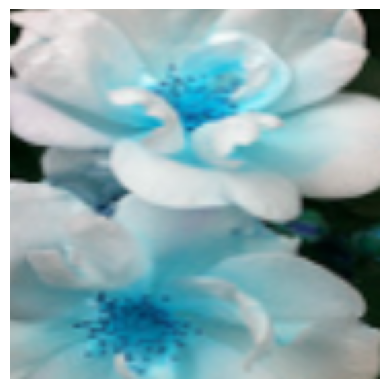

In [101]:
plt.axis("off")
plt.imshow(data_augmentation(x)[0].numpy().astype("uint8"))

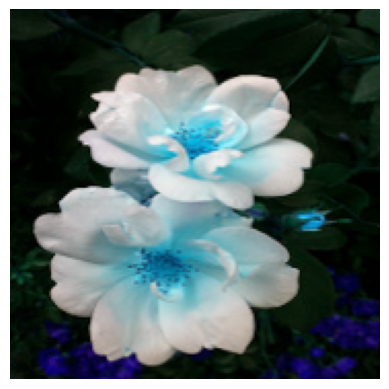

In [99]:
plt.axis("off")
plt.imshow(x[0])

In [96]:
data_augmentation(x)[0]

<tf.Tensor: shape=(180, 180, 3), dtype=float32, numpy=
array([[[19.779127  , 34.592926  , 20.965328  ],
        [17.37562   , 32.18942   , 18.561821  ],
        [15.895899  , 30.824554  , 17.196957  ],
        ...,
        [ 3.9433777 , 12.836893  ,  7.1721373 ],
        [ 3.1174302 , 10.660048  ,  6.4096484 ],
        [ 2.325232  , 10.070384  ,  5.9531775 ]],

       [[21.85605   , 34.710087  , 20.710089  ],
        [18.772995  , 32.650402  , 18.650402  ],
        [17.098478  , 31.383158  , 17.383158  ],
        ...,
        [15.894815  , 29.887756  , 19.678802  ],
        [14.288201  , 24.172846  , 16.572882  ],
        [ 8.332086  , 17.193367  , 10.74996   ]],

       [[21.640703  , 32.40702   , 19.02386   ],
        [19.404356  , 30.71883   , 17.335674  ],
        [18.380495  , 30.293621  , 16.910461  ],
        ...,
        [19.437757  , 38.211346  , 23.52462   ],
        [17.660002  , 36.758377  , 20.276844  ],
        [14.480689  , 31.03624   , 17.168877  ]],

       ...,

     

In [97]:
x

array([[[[  1,  16,   7],
         [  1,  16,   7],
         [  1,  17,   9],
         ...,
         [ 23,  50,  31],
         [ 25,  51,  32],
         [ 26,  52,  33]],

        [[ 10,  23,  15],
         [ 10,  23,  15],
         [  9,  22,  14],
         ...,
         [ 20,  44,  30],
         [ 23,  47,  33],
         [ 26,  50,  36]],

        [[ 13,  20,  13],
         [ 12,  20,  13],
         [ 11,  19,  12],
         ...,
         [ 21,  43,  30],
         [ 22,  45,  31],
         [ 25,  48,  34]],

        ...,

        [[ 12,  24,  18],
         [ 11,  22,  15],
         [ 12,  21,  11],
         ...,
         [  7,  14,   7],
         [  2,   8,   2],
         [  0,   2,   0]],

        [[ 19,  30,  28],
         [ 16,  26,  21],
         [ 14,  22,  15],
         ...,
         [  3,  12,   2],
         [  0,   8,   1],
         [  0,   6,   1]],

        [[ 11,  21,  20],
         [ 17,  25,  24],
         [ 21,  28,  23],
         ...,
         [  1,  12,   2],
        

In [109]:
model=Sequential([
    data_augmentation,
    layers.Conv2D(16,3,padding="same",activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding="same",activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding="same",activation="relu"),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128,activation="relu"),
    layers.Dense(5)
    
])